In [12]:
! pip install lightgbm xgboost catboost scikit-learn


In [1]:
import pandas as pd 
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import joblib as jb

import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("output/processed_data/data_scaled.csv")
data.head()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous,Soil Type_Black,Soil Type_Clayey,Soil Type_Loamy,Soil Type_Red,...,Crop Type_L,Crop Type_Maize,Crop Type_Millets,Crop Type_Oil seeds,Crop Type_Paddy,Crop Type_Pulses,Crop Type_Sugarcane,Crop Type_Tobacco,Crop Type_Wheat,Fertilizer Name
0,-1.229084,-1.230737,-0.462064,1.567539,-0.584910,-2.318979,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Urea
1,-0.368145,-1.230737,0.162128,-0.598658,-0.584910,-1.056400,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,DAP
2,1.066752,1.006492,1.678023,-1.031898,0.970777,-1.266830,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14-35-14
3,0.492793,0.490209,-0.818745,0.267821,-0.584910,-1.617546,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28-28
4,-0.655125,-0.886548,0.251298,1.394244,-0.584910,-1.582474,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Urea


In [4]:
X = data.drop("Fertilizer Name", axis=1)
y = data["Fertilizer Name"]

In [4]:
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,train_size=0.7)

In [5]:
model = RandomForestClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
score = accuracy_score(y_test,y_pred)
score

0.8333333333333334

In [26]:
from sklearn.metrics import classification_report

# Assuming your model and data are already defined and the model is trained as per your code above
y_pred = model.predict(X_test)

# Generate the classification report
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

  10/26/2026       1.00      1.00      1.00         2
    14-35-14       1.00      1.00      1.00         4
    17-17-17       1.00      1.00      1.00         2
       20-20       1.00      1.00      1.00         4
       28-28       1.00      1.00      1.00         5
         DAP       1.00      1.00      1.00         6
        Urea       1.00      1.00      1.00         7

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [28]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import lightgbm as lgb
import xgboost as xgb
import catboost as cb
import numpy as np

# Initialize the label encoder
label_encoder = LabelEncoder()

# Fit label encoder and return encoded labels
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Define the models
models = {
    "RandomForest": RandomForestClassifier(),
    "LightGBM": lgb.LGBMClassifier(),
    "XGBoost": xgb.XGBClassifier(),
    "CatBoost": cb.CatBoostClassifier(verbose=0),
    "LinearRegression": LinearRegression(),
    "MLP": MLPClassifier()
}

# Dictionary to store scores
scores = {}

# Train and evaluate each model
for name, model in models.items():
    if name == "LinearRegression":
        # For Linear Regression, convert to discrete values for classification
        model.fit(X_train, y_train_encoded)
        y_pred = model.predict(X_test)
        y_pred_discrete = np.rint(y_pred)  # Round predictions to nearest integer
        score = accuracy_score(y_test_encoded, y_pred_discrete)
    else:
        model.fit(X_train, y_train_encoded)
        y_pred = model.predict(X_test)
        score = accuracy_score(y_test_encoded, y_pred)
    
    scores[name] = score
    print(f"{name} accuracy: {score:.4f}")


RandomForest accuracy: 0.7667
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000044 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 96
[LightGBM] [Info] Number of data points in the train set: 69, number of used features: 6
[LightGBM] [Info] Start training from score -2.624669
[LightGBM] [Info] Start training from score -1.931521
[LightGBM] [Info] Start training from score -2.624669
[LightGBM] [Info] Start training from score -1.931521
[LightGBM] [Info] Start training from score -1.749200
[LightGBM] [Info] Start training from score -1.749200
[LightGBM] [Info] Start training from score -1.526056
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Lig

/home/godson/devtools/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [29]:
scores

{'RandomForest': 0.7666666666666667,
 'LightGBM': 0.8333333333333334,
 'XGBoost': 0.9333333333333333,
 'CatBoost': 0.9666666666666667,
 'LinearRegression': 0.3,
 'MLP': 0.43333333333333335}

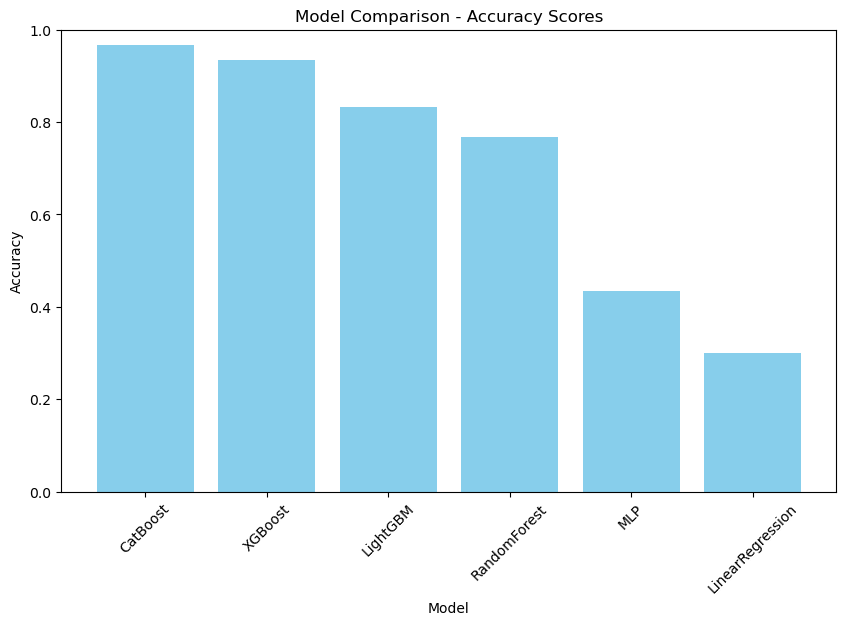

In [30]:
scores_sorted = dict(sorted(scores.items(), key=lambda item: item[1], reverse=True))

# Names of the models
models = list(scores_sorted.keys())
# Corresponding scores
accuracy = list(scores_sorted.values())

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(models, accuracy, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Comparison - Accuracy Scores')
plt.ylim([0, 1])  # Setting the y-axis limit to make the graph more readable
plt.xticks(rotation=45)  # Rotate model names for better readability
plt.show()

In [23]:
model = cb.CatBoostClassifier(verbose=0)
scores = cross_val_score(model, X, y, cv=5)
model.fit(X_test,y_test)
scores

array([0.75      , 0.75      , 0.9       , 0.9       , 0.89473684])

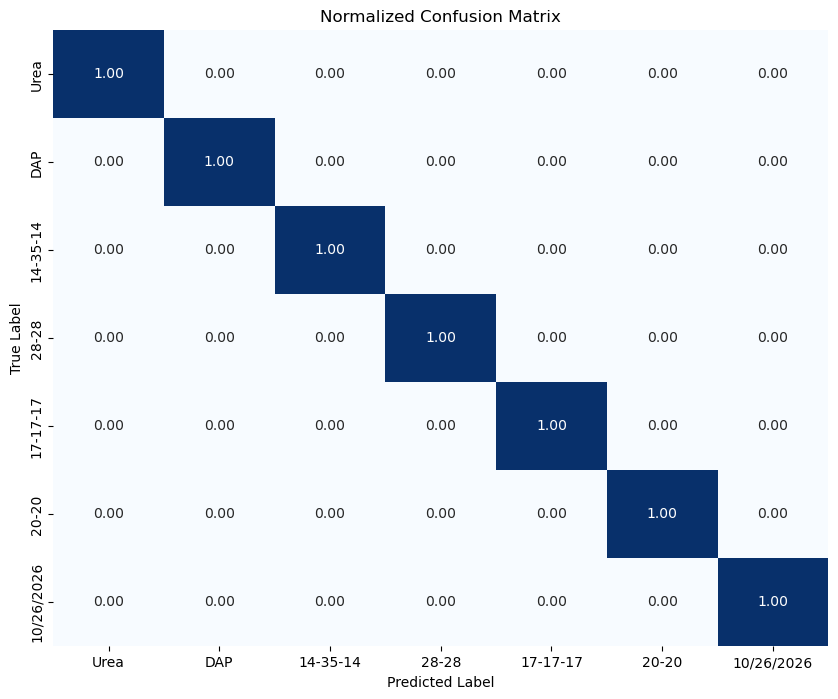

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Assuming y_pred has been obtained through model.predict(X_test)
y_pred = model.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Normalize the confusion matrix by row (i.e., by the number of samples in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Define the labels for the axes
labels = ['Urea', 'DAP', '14-35-14', '28-28', '17-17-17', '20-20', '10/26/2026']

# Plotting
plt.figure(figsize=(10, 8))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap='Blues', cbar=False, xticklabels=labels, yticklabels=labels)
plt.title('Normalized Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


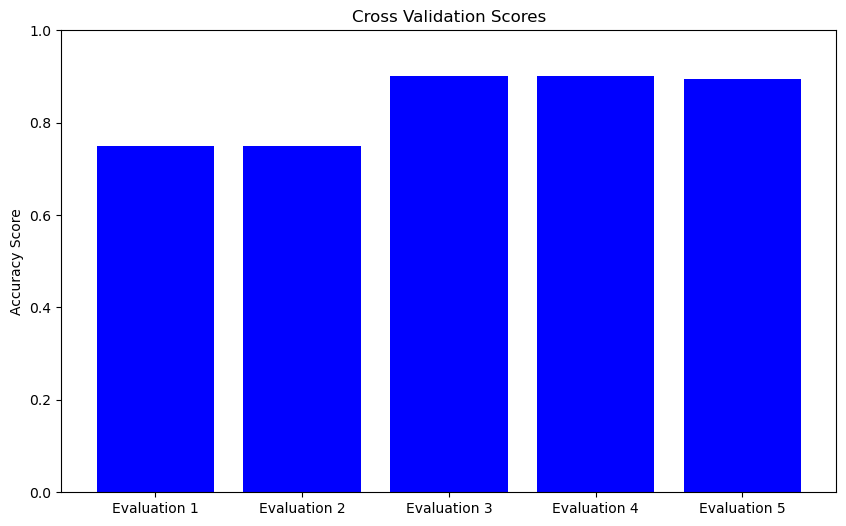

In [25]:
import matplotlib.pyplot as plt

# Assuming scores are obtained from cross_val_scor

# Creating x labels for the number of evaluations
x_labels = ['Evaluation 1', 'Evaluation 2', 'Evaluation 3', 'Evaluation 4', 'Evaluation 5']

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(x_labels, scores, color='blue')

plt.ylabel('Accuracy Score')
plt.title('Cross Validation Scores')
plt.ylim([0, 1])  # Optional: define the y-axis scale to be between 0 and 1 for clarity
plt.show()


In [7]:
model.fit(X,y)
jb.dump(model,"output/model/modelv1.joblib")

['output/model/modelv1.joblib']

Feature importance ranking:
1. Nitrogen: 0.31734277573268177
2. Potassium: 0.1680747935689646
3. Phosphorous: 0.10136750096729692
4. Moisture: 0.09699978156513438
5. Humidity : 0.07292504818951857
6. Temparature: 0.07061147856381962
7. Crop Type_Sugarcane: 0.019230638841702015
8. Crop Type_Cotton: 0.013238428089446086
9. Soil Type_Red: 0.012496520217179811
10. Soil Type_Black: 0.012387555324957993
11. Crop Type_Ground Nuts: 0.01168636687127157
12. Soil Type_Sandy: 0.0111374988579451
13. Crop Type_Millets: 0.011036102100544145
14. Soil Type_Loamy: 0.010508886138205255
15. Soil Type_Clayey: 0.010397873409626827
16. Crop Type_Barley: 0.0101895949234477
17. Crop Type_Tobacco: 0.009882732072986325
18. Crop Type_Oil seeds: 0.008488362214586487
19. Crop Type_Wheat: 0.00837677148476377
20. Crop Type_Paddy: 0.007593132850564188
21. Crop Type_Pulses: 0.007453222830591145
22. Crop Type_Maize: 0.005978273187830408
23. Crop Type_L: 0.002596661996935316


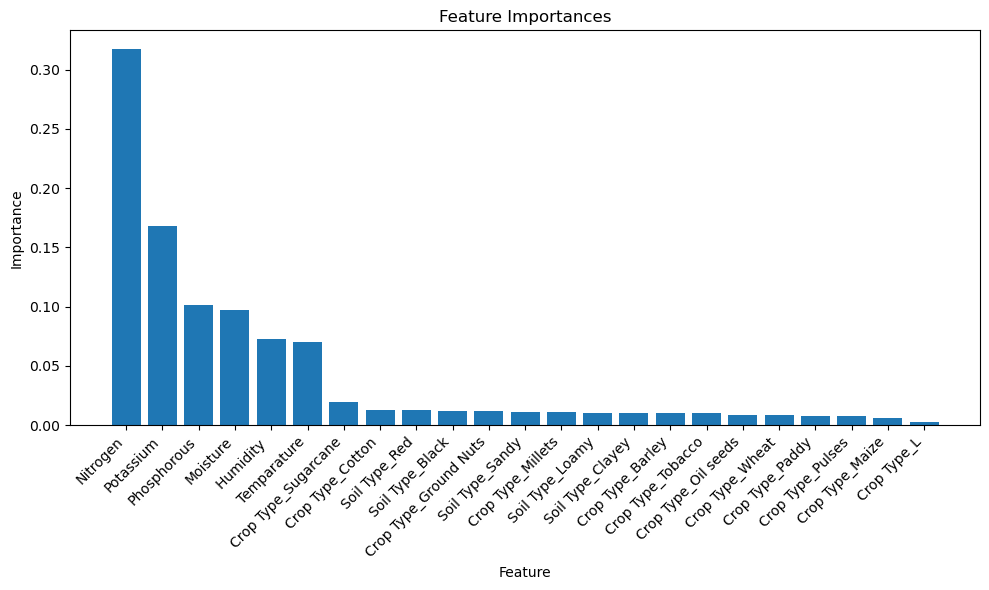

In [8]:
importances = model.feature_importances_

# Sort feature importances in descending order
sorted_indices = np.argsort(importances)[::-1]
feature_names = X.columns
# Print feature importance ranking
print("Feature importance ranking:")
for i, idx in enumerate(sorted_indices):
    print(f"{i+1}. {feature_names[idx]}: {importances[idx]}")

# Visualize feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[sorted_indices], align="center")
plt.xticks(range(X.shape[1]), np.array(feature_names)[sorted_indices], rotation=45, ha="right")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.tight_layout()
plt.show() 